<a href="https://colab.research.google.com/github/dbontr/Particle-Track-Building/blob/main/PHSX512_Skateboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

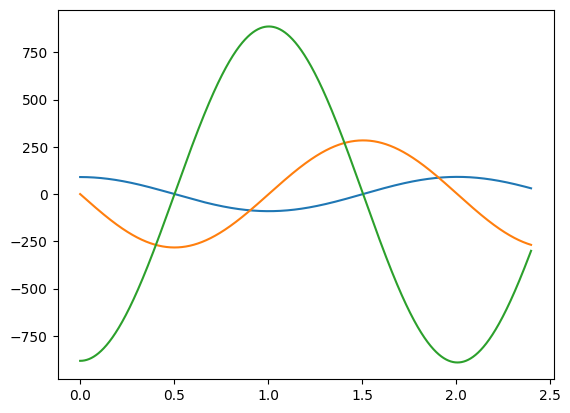

In [ ]:
#define some parameters
r = 1 #meters
g = 9.8 #m/s^2
dt = 0.0005 # seconds, this is the time step overwhich the numerical integration is taken
n = 4800 # this is the number of timesteps taken


# make arrays to keep data
t = np.zeros(n)
phi = np.zeros(n)
omega = np.zeros(n)
alpha = np.zeros(n)


# this function takes in variables g,r, and phi, and uses them to calculate the angular acceleration, pdd, and return it
def phiddot(g,r,p):
  pdd = - g*p/r   # angular acceleration, phi double dot, is equal to -g*phi/radius for the small angle approximation
  return pdd


#define the initial values
t_0 = 0 # start at time = 0
phi_0 = m.pi/2 # phi is defined from the negative y axis, so if we start at the top of the half pipe, we are at 90 deg = pi/2.
omega_0 = 0 # no initial angular speed

# start the arrays off with the inital values
t[0] = t_0
phi[0] = phi_0
omega[0] = omega_0
alpha[0] = phiddot(g,r,phi[0])


# integrate using the Euler method where df/dt = g so f =f_0 +  g*dt. This can be found numerically by adding up each g*dt sum over many "timesteps"
for i in range(n-1):
  omega[i+1] = omega[i] + alpha[i]*dt # this is the same as phi dot, the velocity of phi/time. phidot = phidot_o + alpha*dt
  phi[i+1] = phi[i] + omega[i]*dt # this is the angular position, phi. phi = phi_0 + omega*dt
  t[i+1] = t[i]  + dt
  alpha[i+1] = phiddot(g,r,phi[i])# this is the same as phi double dot, the acceleration in phi


#plot of angular position, velocity and acceleration - modify as wanted
plt.plot(t,phi*180/m.pi) # blue line, position, shown in degrees
plt.plot(t,omega*180/m.pi) # orange line, velocity shown in deg/second
plt.plot(t,alpha*180/m.pi) # green line, acceleration, shown in deg/second^2
